In [16]:
import pandas as pd 
import matplotlib
from fbprophet import Prophet
%matplotlib inline
def parser(x):
    return pd.datetime.strptime(x,'%Y-%m-%d')
 
train_df = pd.read_csv('train.csv', header=0,usecols=['date','store','item','sales'])
train_df = train_df[train_df['store']==1]
train_df = train_df[train_df['item']==1]


train_df.head()

df=train_df.copy()
df['date'].min(), df['date'].max()
df['date'] = pd.to_datetime(df['date'])
df=df.set_index('date')
y=df
y = df['sales'].resample('MS').sum()

In [17]:
train=y[0:-12]
valid=y[-12:]

In [18]:
train.tail()

date
2016-08-01    727
2016-09-01    709
2016-10-01    699
2016-11-01    662
2016-12-01    496
Freq: MS, Name: sales, dtype: int64

In [19]:
train = pd.DataFrame(train).reset_index()
train.columns = ['ds', 'y']
train.head()

,ds,y
0,2013-01-01,328
1,2013-02-01,322
2,2013-03-01,477
3,2013-04-01,522
4,2013-05-01,531


In [58]:
m = Prophet()
m.fit(train)
future = m.make_future_dataframe(periods=12,freq = 'm',)
forecast = m.predict(future)
forecast

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2013-01-01,464.255861,317.905090,358.069863,464.255861,464.255861,-126.314778,-126.314778,-126.314778,-27.746080,-27.746080,-27.746080,-98.568698,-98.568698,-98.568698,0.0,0.0,0.0,337.941084
1,2013-02-01,471.194094,293.215882,332.183956,471.194094,471.194094,-159.345216,-159.345216,-159.345216,30.765525,30.765525,30.765525,-190.110741,-190.110741,-190.110741,0.0,0.0,0.0,311.848879
2,2013-03-01,477.460886,447.323572,489.110731,477.460886,477.460886,-9.275578,-9.275578,-9.275578,30.765525,30.765525,30.765525,-40.041103,-40.041103,-40.041103,0.0,0.0,0.0,468.185308
3,2013-04-01,484.399119,467.180437,506.926505,484.399119,484.399119,3.636265,3.636265,3.636265,-28.966994,-28.966994,-28.966994,32.603259,32.603259,32.603259,0.0,0.0,0.0,488.035383
4,2013-05-01,491.113538,546.991709,587.302592,491.113538,491.113538,76.446001,76.446001,76.446001,-7.249094,-7.249094,-7.249094,83.695095,83.695095,83.695095,0.0,0.0,0.0,567.559539
5,2013-06-01,498.051771,629.853502,670.796049,498.051771,498.051771,152.222392,152.222392,152.222392,21.753404,21.753404,21.753404,130.468988,130.468988,130.468988,0.0,0.0,0.0,650.274163
6,2013-07-01,504.766190,657.429225,698.498528,504.766190,504.766190,173.167851,173.167851,173.167851,-28.966994,-28.966994,-28.966994,202.134846,202.134846,202.134846,0.0,0.0,0.0,677.934041
7,2013-08-01,511.704423,579.654796,618.784052,511.704423,511.704423,87.630873,87.630873,87.630873,12.826267,12.826267,12.826267,74.804606,74.804606,74.804606,0.0,0.0,0.0,599.335296
8,2013-09-01,518.642656,518.173450,557.693016,518.642656,518.642656,18.836484,18.836484,18.836484,-1.383028,-1.383028,-1.383028,20.219511,20.219511,20.219511,0.0,0.0,0.0,537.479140
9,2013-10-01,525.357075,468.387568,506.409779,525.357075,525.357075,-37.671533,-37.671533,-37.671533,-27.746080,-27.746080,-27.746080,-9.925453,-9.925453,-9.925453,0.0,0.0,0.0,487.685542


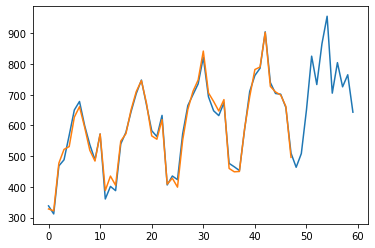

In [59]:
import matplotlib.pyplot as plt
plt.plot(forecast['yhat'])
plt.plot(train['y'])


In [60]:
forecast['yhat'][-12:]

48    463.695422
49    508.243897
50    650.821774
51    825.424947
52    733.009149
53    865.890775
54    955.425621
55    704.988476
56    804.359847
57    725.639695
58    764.887009
59    643.024918
Name: yhat, dtype: float64

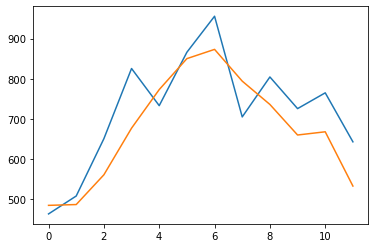

In [61]:
plt.plot(forecast['yhat'][-12:].values)
plt.plot(valid.values)

In [62]:
forecast['yhat'][-12:]


48    463.695422
49    508.243897
50    650.821774
51    825.424947
52    733.009149
53    865.890775
54    955.425621
55    704.988476
56    804.359847
57    725.639695
58    764.887009
59    643.024918
Name: yhat, dtype: float64

In [63]:
from sklearn.metrics import mean_absolute_error
from math import sqrt
from sklearn.metrics import mean_squared_error
expected =  forecast['yhat'][-12:].values
predictions = valid.values

mae = mean_absolute_error(expected, predictions)
print('MAE: %f' % mae)
mse = mean_squared_error(expected, predictions)
print('MSE: %f' % mse)
rmse = sqrt(mse)
print('RMSE: %f' % rmse)

MAE: 70.752120
MSE: 6503.844739
RMSE: 80.646418


In [64]:
valid.values,forecast['yhat'][-12:].values


(array([485, 487, 561, 677, 773, 850, 873, 794, 736, 660, 668, 533],
       dtype=int64),
 array([463.69542161, 508.24389735, 650.8217736 , 825.42494747,
        733.00914943, 865.89077461, 955.42562121, 704.98847619,
        804.35984737, 725.63969477, 764.88700873, 643.02491819]))